<a href="https://colab.research.google.com/github/fescobar96/Computer-Vision-Architectures/blob/master/LeNet_5_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Import and Preprocess Data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
n_classes = 10

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

Create and Train Model

In [0]:
model = Sequential()

# First Stage
model.add(Conv2D(filters = 20, kernel_size = (5, 5), padding = 'same', input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

# Second Stage
model.add(Conv2D(filters = 50, kernel_size = (5, 5), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

#Third Stage
model.add(Flatten())
model.add(Dense(units = 500))
model.add(Activation('relu'))

#Fourth Stage
model.add(Dense(units = n_classes))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0

In [0]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
batch_size = 32
epochs = 3

In [11]:
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1008 - accuracy: 0.9686 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0276 - val_accuracy: 0.9917
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0309 - accuracy: 0.9909 - val_loss: 0.0402 - val_accuracy: 0.9900


Visualize Results

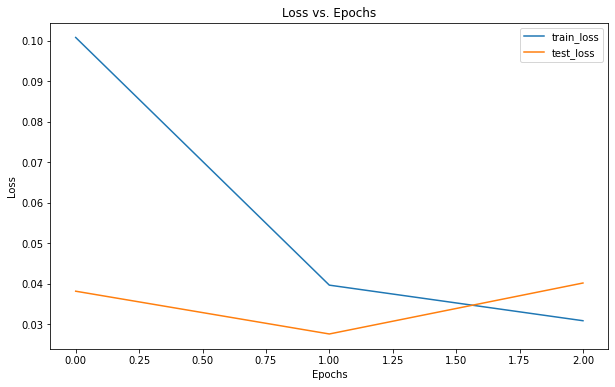

In [12]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,epochs), history.history['loss'], label='train_loss')
plt.plot(np.arange(0,epochs), history.history['val_loss'], label='test_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

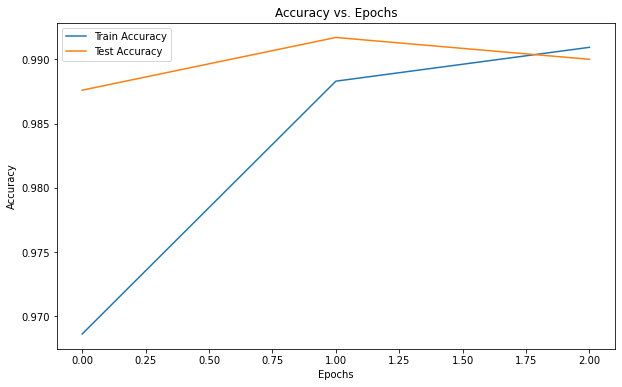

In [13]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,epochs), history.history['accuracy'], label='Train Accuracy')
plt.plot(np.arange(0,epochs), history.history['val_accuracy'], label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()